# Building a system in python for House price prediction system using Machine Learning with Python.

### Here, we would be using XGBoost Regressor model for the prediction.

Work Flow
 1. Collecting Diabetes Data
 2. Data pre processing
 3. Doing basic data analysis
 4. Splitting into Train and Test 
 4. Feeding into ML model - XGBoost Regressor Model here
 5. Receive a trained Logistic Regression model.

      -- When we give any new data the model will predict the price of the house.

In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [2]:
# Data Collection and Data Processing

# Loading Dataset
house_price_data = sklearn.datasets.load_boston()
house_price_data

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [3]:
# Converting the given dataset as pandas dataframe
house_price_df = pd.DataFrame(house_price_data.data, columns = house_price_data.feature_names)
house_price_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
# Adding the target columns to the Dataframe
house_price_df['price'] = house_price_data.target
house_price_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
house_price_df.shape

(506, 14)

In [6]:
# Checking for missing or null values
house_price_df.isnull().sum()
# if any missing/null values found use function .dropna()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

In [7]:
house_price_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


##### Types of correlation between various features in the dataset

###### 1. Positive Correlation
###### 2. Neagtive Correlation

In [8]:
correlation = house_price_df.corr()

<Axes: >

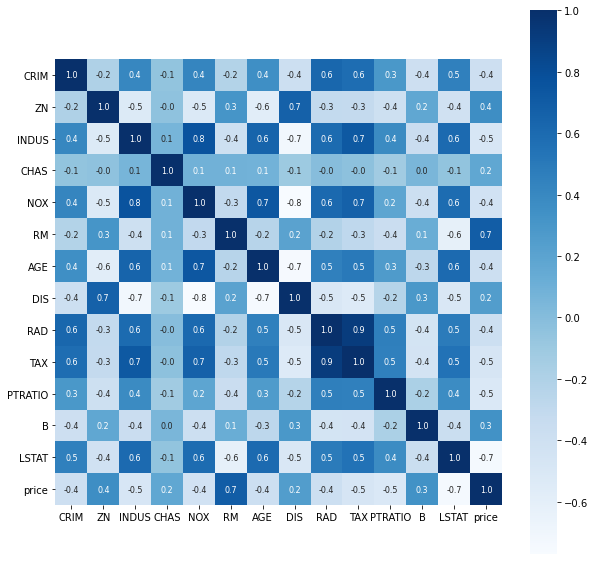

In [10]:
# Generating a heatmap to understand correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')
#cbar = color bar at right most ; fmt = how many float values do we want ; annot = annotations or feature names 

In [11]:
 # Seperating Data and Labels
X = house_price_df.drop(columns=['price'], axis=1)
Y = house_price_df['price']

print(X)
print(Y)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       1

In [12]:
# Splitting into Training and Testing data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=1 ) 
# test_size means splitting ratio 0.2 means 80-20 distribution
# random_state = 1 means splitting the data in a particylar way if state = 2 it is splitted inna different manner

print(X.shape, X_train.shape, X_test.shape)

(506, 13) (404, 13) (102, 13)


In [13]:
# Creating the XGBoost Regressor model
model = XGBRegressor()

In [14]:
# Training the model with training data
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [15]:
# Evaluating the model 

# Finding accuracy of training data

training_data_prediction = model.predict(X_train)
training_data_prediction

array([25.245571 , 23.32921  ,  7.210682 , 21.154896 , 11.702352 ,
       26.999006 , 29.584614 , 26.544731 , 43.50524  , 23.625568 ,
       11.002917 , 33.40945  , 36.007214 , 36.40028  , 19.037712 ,
       20.18499  , 34.905746 , 49.99532  , 19.321676 , 14.898901 ,
       26.617535 , 19.894657 , 24.802687 , 21.180086 , 23.923895 ,
       20.586973 , 23.074522 , 27.950964 , 19.987543 , 23.094906 ,
       25.010534 ,  9.705043 , 23.892748 , 36.09172  , 13.418543 ,
       12.731809 , 39.79168  , 10.393237 , 20.598629 , 17.775103 ,
       19.482315 , 23.710855 , 28.513987 , 24.29506  , 23.771362 ,
       19.072584 , 28.377209 , 20.49642  , 33.825535 , 14.507262 ,
       20.39619  , 16.009405 , 13.304443 , 30.793392 , 27.49651  ,
       24.428276 , 24.389343 , 25.122246 , 43.8164   , 21.898586 ,
       26.22088  , 14.255268 , 20.789656 , 20.105751 , 23.099632 ,
       13.068087 , 16.195873 , 24.834087 , 20.208426 , 22.484184 ,
       14.791592 , 28.696594 , 20.114979 , 23.412987 , 31.9928

In [16]:
# Finding the R Squared Error
score_1 = metrics.r2_score(Y_train,training_data_prediction)
print("R squared error :", score_1)
# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_train,training_data_prediction)
print("Mean absolute error :", score_2)

R squared error : 0.9999952977725205
Mean absolute error : 0.01375658535721277


In [17]:
# Finding accuracy of testing data

testing_data_prediction = model.predict(X_test)
testing_data_prediction

array([30.359884, 27.026636, 19.17616 , 21.448114, 20.703493, 20.424747,
       27.9036  , 17.878405, 21.678137, 23.36513 , 25.411674, 33.19199 ,
       21.495481, 19.939993, 19.990822, 28.529932, 13.219593, 44.483154,
       25.460302, 11.562899, 19.486588, 17.153116, 24.325785, 23.509218,
       27.791344,  8.616411, 14.683976, 19.01615 , 45.651524, 12.10203 ,
       22.976582, 17.523937, 48.34446 , 16.573458, 24.024517, 21.818398,
       14.679352, 35.878193, 16.073364, 20.764208, 25.262817, 22.376215,
       24.78839 , 14.799538, 16.877083, 11.262062, 46.995094, 11.280138,
       21.217411, 18.637756, 23.77302 , 20.691387, 25.980684, 20.501291,
        8.173699, 22.731295, 11.759897, 24.526464, 18.271172, 38.32712 ,
       12.570583, 25.870787, 12.011916, 13.295293, 17.679295, 35.901722,
       37.55958 , 23.164257, 20.201231, 20.955679, 24.68425 ,  7.049963,
       18.19561 , 19.824377, 19.77468 , 20.867382, 40.98662 , 24.473787,
       27.369884, 31.096327, 16.441713, 19.326612, 

In [18]:
# Finding the R Squared Error
score_1 = metrics.r2_score(Y_test,testing_data_prediction)
print("R squared error :", score_1)
# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_test,testing_data_prediction)
print("Mean absolute error :", score_2)

R squared error : 0.9085331557145866
Mean absolute error : 2.344013180452235


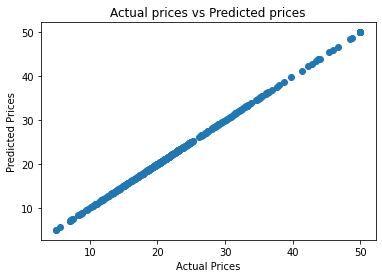

In [19]:
# Visualizing the Actual prices vs Predicted prices

plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual prices vs Predicted prices")
plt.show()

### Making the Prediction System

In [ ]:
# Sample input 1 : '0.00632, 18.0, 2.31, 0.0, 0.538, 6.575, 65.2, 4.0900, 1.0, 296.0, 15.3, 396.90, 4.98'
# Sample input 2 : '0.03237, 0.0, 2.18, 0.0, 0.458, 6.998, 45.8, 6.0622, 3.0, 222.0, 18.7, 394.63, 2.94'
input_data = () #enter you input here

#converting the input data into a numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshaping the numpy array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# Predicting the price
prediction = model.predict(input_data_reshaped)
print(prediction)

### Feature Importance Visualization:
##### Create visualizations to showcase the importance of different features in your model's predictions.

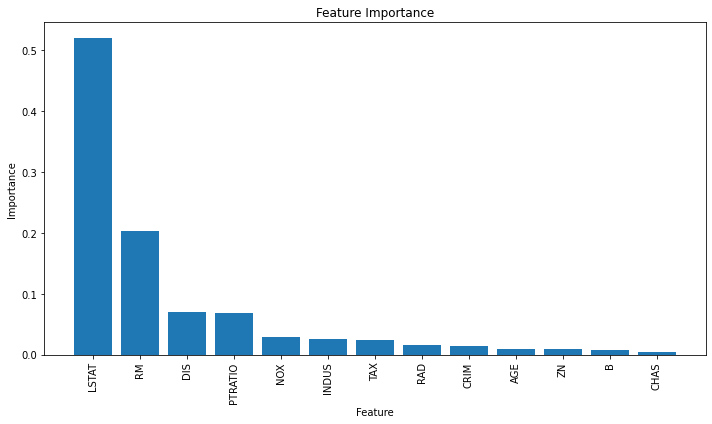

In [22]:
feature_importances = model.feature_importances_
feature_names = house_price_data.feature_names

sorted_idx = np.argsort(feature_importances)[::-1]
sorted_feature_names = feature_names[sorted_idx]

plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_importances[sorted_idx])
plt.xticks(range(X.shape[1]), sorted_feature_names, rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.tight_layout()
plt.show()


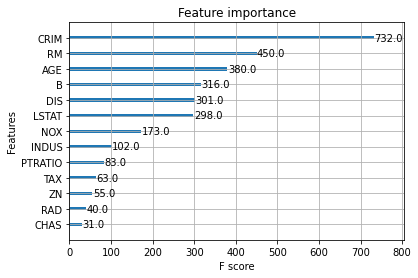

In [21]:
import xgboost
xgboost.plot_importance(model, importance_type='weight')  # Other types: 'gain', 'cover'
plt.show()